# [KDT] ch3 가설 검정

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 파일 로딩 
df_hk = pd.read_csv('.\\data\hk_221206.csv')
df_hk.head(5)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [5]:
# Data type을 살펴보고 EDA를 수행 
df_hk.describe()

,height,age,salary,expenditure
count,250.000000,250.000000,250.000000,250.000000
mean,169.569200,39.240000,6357.480000,4971.480000
std,12.283857,8.653899,1849.791383,1861.112508
min,148.100000,20.000000,3080.000000,1330.000000
25%,159.300000,33.000000,5002.500000,3593.750000
50%,168.750000,39.000000,6100.000000,4762.500000
75%,180.375000,46.000000,7427.500000,6272.500000
max,191.800000,55.000000,11990.000000,10865.000000


## 1 sample t-test

$ H_0 : \mu = \mu_0$

$ H_1 : \mu \neq \mu_0$

In [7]:
# 1 sample t-test
df_hk['age']

0      22
1      31
2      55
3      28
4      29
       ..
245    50
246    51
247    52
248    53
249    54
Name: age, Length: 250, dtype: int64

In [8]:
# t-test를 할 data의 mean
df_hk['age'].mean()

39.24

In [ ]:
# describe


<AxesSubplot:ylabel='Frequency'>

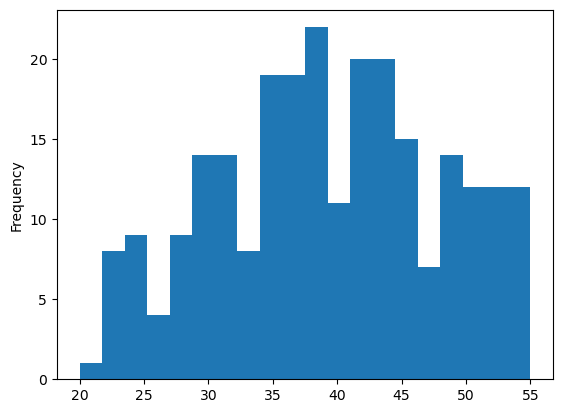

In [10]:
# age의 histogram
df_hk['age'].plot.hist(bins = 20)

In [11]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰 , 39.24
from scipy.stats import ttest_1samp
ttest_1samp(df_hk['age'], popmean=30) 

Ttest_1sampResult(statistic=16.882244149646134, pvalue=3.847271424260211e-43)

In [12]:
3.847271424260211e-43 < 0.05

True

In [13]:
ttest_1samp(df_hk['age'], popmean=38) 

Ttest_1sampResult(statistic=2.265582548220913, pvalue=0.024336341875188777)

In [16]:
ttest_1samp(df_hk['age'], popmean=38.5) 
ttest_1samp(df_hk['age'], popmean=38.5)[1] < 0.05 # 귀무가설 채택, 같다, 95% 신뢰수준에서

False

In [18]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰
ttest_1samp(df_hk['age'], popmean=39) 
# ttest_1samp(df_hk['age'], popmean=39)[1] < 0.05

Ttest_1sampResult(statistic=0.43849984804276027, pvalue=0.6614041860727076)

In [19]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰
ttest_1samp(df_hk['age'], popmean=39.24) 

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [ ]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰


### 2 sample t-test


$ H_0 : \mu_0 = \mu_1$

$ H_1 : \mu_0 \neq \mu_1$

In [24]:
# A,B,C회사 연봉 평균

salary_a = df_hk[df_hk['company'] == 'A'].salary.mean()
salary_b = df_hk[df_hk['company'] == 'B'].salary.mean()
salary_c = df_hk[df_hk['company'] == 'C'].salary.mean()

print('salary_a = ', salary_a)
print('salary_b = ', salary_b)
print('salary_c = ', salary_c)

salary_a =  6522.5
salary_b =  5364.4
salary_c =  8013.6


In [28]:
# 2 sample t-test (A=B)
from scipy.stats import ttest_ind

a = df_hk[df_hk['company'] == 'A'].salary
b = df_hk[df_hk['company'] == 'B'].salary

ttest_ind(a, b)

Ttest_indResult(statistic=5.941362455469809, pvalue=1.2532322871358408e-08)

In [30]:
# 2 sample t-test (A>=B) less

ttest_ind(a, b, alternative='less') # A > B   # B가 기준,  Ho: B가 작다     # Ho 채택 -> B가 작다고 볼 수 있다

Ttest_indResult(statistic=5.941362455469809, pvalue=0.9999999937338386)

In [32]:
# 2 sample t-test (A<=B) greater
ttest_ind(a, b, alternative='greater')  # A < B   B가 기준,  Ho: B가 크다     # Ho 기각 -> B가 크다고 볼 수 없다

Ttest_indResult(statistic=5.941362455469809, pvalue=6.266161435679204e-09)

-----------------------------------------------------------------------

## Quiz 1

1) iris 데이터를 사용하여('iris.csv') species column 'virginica'의 'sepal_width' 모평균이 3.14와 같은지 가설을 수립하고 
   유의수준 0.05에서 검정하시오

2) 'setosa'와 'versicolor'의 sepal_length 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

In [ ]:
# 파일 로딩 


In [ ]:
# 가설검정
# H0 : 'virginica'의 'sepal_width' 모평균이 3.14 와 같다고 볼 수 있다 (유의수준 0.05)
# H1 : 'virginica'의 'sepal_width' 모평균이 3.14 와 같다고 볼 수 없다 (유의수준 0.05)

In [ ]:
from scipy.stats import ttest_1samp, ttest_ind


In [ ]:
# 가설검정
# H0 : 'setosa'와 'versicolor' 의 sepal_length 평균이 같다고 볼 수 있다 (유의수준 0.05)
# H1 : 'setosa'와 'versicolor' 의 sepal_length 평균이 같다고 볼 수 없다 (유의수준 0.05)

In [ ]:
from scipy.stats import ttest_1samp, ttest_ind


-----------------------------------------------------------------------

## ANOVA

$ H_0 : \mu_1 = \mu_2 = \mu_3$

$ H_1 : \mu_1 \neq \mu_2  \quad or  \quad  \mu_2 \neq \mu_3  \quad   or  \quad  \mu_1 \neq \mu_3$

In [ ]:
# A,B,C회사 연봉 평균이 같은지 검정


In [ ]:
# ANOVA scipy.stats 사용


In [ ]:
# ANOVA statsmodels 사용


In [ ]:
# 시각화 box plot


In [ ]:
# ANOVA 사후검정


In [ ]:
# grade별 연봉 평균
# ANOVA scipy.stats 사용


In [ ]:
# pairwise_tukeyhsd 확인


In [ ]:
# ANOVA statsmodels 사용


## Quiz 2

1) 'setosa' , 'versicolor', 'virginica'의 sepal_length 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

2) bike 데이터(bike.cvs)를 사용하여, 요일별 registered 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

3) 평균이 같지 않을때, 평균이 유의수준 0.05에서 차이나지 않는 조합(False)은 몇 개인가 ? 

In [ ]:
# 파일 로딩 


In [ ]:
# 가설검정
# H0 :  'setosa' , 'versicolor', 'virginica'의 'sepal_length' 평균이 같다고 볼 수 있다 (유의수준 0.05)
# H1 :  'setosa' , 'versicolor', 'virginica'의 'sepal_length' 평균이 셋 중 어느 하나는 다르다고 볼 수 있다 (유의수준 0.05)

In [ ]:
# ANOVA scipy.stats 사용


In [ ]:
# ANOVA statsmodels 사용


In [ ]:
# ANOVA 사후검정


## Quiz 3

1) bike 데이터(bike.cvs)를 사용하여, 요일별 registered 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

2) 평균이 같지 않을때, 평균이 유의수준 0.05에서 차이나지 않는 조합(False)은 몇 개인가 ? 

In [ ]:
# 파일 로딩 


In [ ]:
# 요일변수 생성


In [ ]:
# ANOVA statsmodels 사용

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [ ]:
# ANOVA 사후검정

from statsmodels.stats.multicomp import pairwise_tukeyhsd


## 상관분석

In [ ]:
# 파일 로딩


In [ ]:
# Correlation analysis


In [ ]:
# pearsonr, spearmanr, kendalltau

In [ ]:
# pearsonr


In [ ]:
# spearmanr


In [ ]:
# kendalltau


In [ ]:
# scatterplot 시각화


## Quiz 4

bike 데이터(bike.cvs)를 사용하여

1) temp, atemp, humidity, registered의 상관 계수중 가장 높은것은 ?

2) season별로 자전거 총 대여 숫자(count)와의 상관분석을 실시하고 상관 계수가 가장 높은 계절을 구하시오 

3) 날씨가 맑은날(weather = 1) 과 그렇지 않은날 온도(temp)와 자전거 대여 숫자(casual)의 상관계수의 절대값은 얼마인가 ?

In [ ]:
# 파일 로딩 


In [ ]:
# 1) temp, atemp, humidity, registered의 상관 계수중 가장 높은것은 ?


In [ ]:
# 2) season별로 atemp와 자전거 대여 숫자(casual)와의 상관분석을 실시하고 상관 계수가 가장 높은 계절을 구하시오


In [ ]:
# 3) 날씨가 맑은날(weather = 1) 과 그렇지 않은날 온도(temp)와 자전거 대여 숫자(casual)의 상관계수의 절대값은 얼마인가 ?


## 카이스퀘어 검정

$H_0:$ 두 변수는 서로 독립임 (연관이 없음)

$H_1:$ 두 변수는 서로 독립이 아님 (연관이 있음)

In [ ]:
# 파일 로딩

In [ ]:
# chi-squared test 1

In [ ]:
# chi2_contingency


In [ ]:
# chi-squared test 2


## Quiz 5

bike 데이터(bike.cvs)를 사용하여

1) season과 weather dtype을 문자형으로 변환하고 

   두 변수가 관련있는지 적절한 검정을 하고 검정통계량과 p-value를 구하시오  

2) 자전거 총 대여수(count)가 상위 30%일때 'high', 그 미만 일때 'low' 인 파생변수(count_high)를 생성하고
   count_high와 workingday의 독립성 여부를 검정하고 검정 통계량을 구하시오 (소숫점 넷째자리 반올림하여 표기)

In [ ]:
# 파일 로딩 


In [ ]:
# 1) season과 weather dtype을 문자형으로 변환하고
#    두 변수가 관련있는지 적절한 검정을 하고 검정통계량과 p-value를 구하시오


In [ ]:
# 2) 자전거 총 대여수(count)가 상위 30%일때 'high', 그 미만 일때 'low' 인 파생변수(count_high)를 생성하고
#    count_high와 workingday의 연관성 여부를 검정하고 검정 통계량을 구하시오 (소숫점 넷째자리 반올림하여 표기)


## Quiz 6

<br>교육 전문기관 분석팀에서는 교육 수강자의 정보를 바탕으로 진로설계 프로그램을 운영하기 위해 다음 정보를 수집하였다.
<br>DS_Sample_2.csv (구분자: comma(“,”), 19,158 Rows, 15 Columns, UTF-8 인코딩)

<br>분석을 수행하기 전, 상기 데이터를 이용하여 아래의 전처리를 수행하시오.

<br>단계 1: 분석에 사용하지 않을 city, company_size, company_type 컬럼을 제거하시오.
<br>단계 2: 각 문자형(String Type) 컬럼에 결측치(null/empty space)가 하나라도 존재하는 행(row)은 모두 제거하시오.
<br>단계 3: experience 컬럼의 값이 ‘>20’ 또는 ‘<1’인 값을 제거하고 experience 컬럼의 타입을 정수형(Integer)으로 변환하시오.
<br>단계 4: last_new_job 컬럼의 값이 ‘>4’ 또는 ‘never’인 값을 제거하고 last_new_job컬럼의 타입을 정수형(Integer)으로 변환하시오.

<br>상기 전처리를 완료한 데이터셋(데이터셋명: job2, 7,522 Rows)을 이용하여 다음 문제에 답하시오.

<br>(job2를 이용하여) ‘관련 분야 경험 여부(relevant_experience)’에 따른 ‘이직 희망 여부(target)’를 기술통계량으로 확인하고자 한다.
<br>관련 분야 경험이 없는(relevant_experience=‘No relevant experience’) 수료자 중 이직을 희망(target=’1’)하는 수료자의 비율을 A,
<br>관련 분야 경험이 있는(relevant_experience=’Has relevant experience’) 수료자 중 이직을 희망(target=’1’)하는 수료자의 비율을 B라 할때, A/B를 구하시오.
-	소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지 기술하시오.
<br>(답안예시) 12.34


In [ ]:
# 파일 로딩


In [ ]:
# 단계 1: 분석에 사용하지 않을 city, company_size, company_type 컬럼을 제거하시오


In [ ]:
# 단계 2: 각 문자형(String Type) 컬럼에 결측치(null/empty space)가 하나라도 존재하는 행(row)은 모두 제거하시오.


In [ ]:
# 단계 3: experience 컬럼의 값이 ‘>20’ 또는 ‘<1’인 값을 제거하고 experience 컬럼의 타입을 정수형(Integer)으로 변환하시오.


In [ ]:
# 단계 4: last_new_job 컬럼의 값이 ‘>4’ 또는 ‘never’인 값을 제거하고 last_new_job컬럼의 타입을 정수형(Integer)으로 변환하시오.


In [ ]:
# No relevant experience 중 target = 1 을 A,
# Has relevant experience 중 target = 1 을 B라 할때, A/B를 구하시오
